> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDB_MOVIES]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

## Dataset Description
    This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset contains 21 columns as well.

## Some Questions to Answer
        1 a- Do the best rated movies cost fortunes to produce?
          b- Who are the top 10 most casted actors
          c- Which companies have been involved in the production of movies the most
          d- What genre of movies are the most popular
          
        2 - Which year recorded the highest number of movie releases
        
        3 - Does popular movies make high profits?

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.1.5

Requirement already up-to-date: pandas==1.1.5 in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
DataSet = 'tmdb-movies.csv'

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
def load_data(Dataset):
    df = pd.read_csv(Dataset, index_col='id', parse_dates=['release_date'])
    return df


movie_df = load_data(DataSet)
movie_df.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
movie_df.shape

(10866, 20)

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               10856 non-null  object        
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   homepage              2936 non-null   object        
 7   director              10822 non-null  object        
 8   tagline               8042 non-null   object        
 9   keywords              9373 non-null   object        
 10  overview              10862 non-null  object        
 11  runtime               10866 non-null  int64         
 12  genres                10843 non-null  object        
 13  production_

### Create a simple function to separate the columns with that have null values. This can be called anytime we need to comfirm the columns with empty values

In [7]:
def empt_col_fn():
    check_empty_col = movie_df.columns
    empt_col = list()
    #non_empt_col = list()
    for col in check_empty_col:
        if movie_df[col].isnull().values.any() == True:
            empt_col.append(col)
    return empt_col


len_null_cols = empt_col_fn()
display("There are {} columns with Null values".format(len(len_null_cols)))

'There are 9 columns with Null values'

## The Dataset assessment result

>The dataset conatains 21 columns, this has however been reduced to 20 column by indexing the id column.
    There are 4 float datatypes, 10 Object datatype, 5 Integer type and a datetime datatype as result of parsing
    the release_year in the dataset loading process"
    

In [8]:
movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
#Are there duplicate records in the dataset?

check_duplicates = sum(movie_df.duplicated())
check_duplicates

1

In [10]:
#Since a data record was discovered to have duplicate entry, we need to take one of it down

movie_df.drop_duplicates(inplace=True)

In [11]:
# Confirm the duplicated record has been removed

sum(movie_df.duplicated())

0

### Drop rows with zero mins runtime

>A movie needs to have a runtime of at least some reasonable minutes. From the summary statistics, some movies have
0 mins. There are 2 possible explanations to this, either the entry was wrong or the movies never went to live. We can
either change this value to a mean value or remove them completely. For this situation, the rows affected are small enough,
so we have the luxury to take them down

In [12]:
# Create a new dataframe with runtime of 0, then pass this as a negative mask into the
# movie_df to recreate it with all rows except those with 0 runtime values

zero_runtime_movie_df = movie_df['runtime']==0
movie_df = movie_df[~zero_runtime_movie_df]

In [13]:
# Check the dataset shape to confirm the change has been effected

movie_df.shape

(10834, 20)

### Drop Some Columns not Necessary for our Analysis

    For our analysis, a few columns might be best to drop as early as this stage. This can be best
    for memory performance as well as reduce our dataset columns for easy visuals

In [14]:
movie_df.drop(columns=['overview','keywords','imdb_id','homepage','tagline'], inplace=True, errors='ignore')
movie_df.sort_values('release_date').head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,
26119,0.338541,0,0,Chato's Land,Charles Bronson|Jack Palance|James Whitmore|Si...,Michael Winner,110,Action|Adventure|Western,Scimitar Films,1972-01-01,15,6.6,1972,0.000000e+00,0.000000e+00
15516,0.384193,90000,0,The Last House on the Left,Sandra Peabody|Lucy Grantham|David Hess|Fred J...,Wes Craven,84,Horror|Thriller,Lobster Enterprises|Sean S. Cunningham Films|T...,1972-01-01,46,6.1,1972,4.693105e+05,0.000000e+00
15573,0.265891,0,7500000,The Cowboys,John Wayne|Roscoe Lee Browne|Bruce Dern|Collee...,Mark Rydell,131,Action|Adventure|Drama|Western,Warner Bros.,1972-01-13,30,6.6,1972,0.000000e+00,3.910921e+07
10784,0.669045,6000000,0,Cabaret,Liza Minnelli|Michael York|Helmut Griem|Joel G...,Bob Fosse,124,Drama|Music|Romance,ABC Pictures|Bavaria Film|Allied Artists Pictures,1972-02-13,76,6.9,1972,3.128737e+07,0.000000e+00
40022,0.152463,0,0,Milano Calibro 9,Gastone Moschin|Barbara Bouchet|Mario Adorf|Fr...,Fernando Di Leo,100,Crime|Action,NaN,1972-02-15,11,6.6,1972,0.000000e+00,0.000000e+00


In [15]:
empt_col_fn()

['cast', 'director', 'genres', 'production_companies']

### Manipulating the revenue_adj and budget_adj per Million 
    We need to clean the revenue_adj and budget_adj columns by dividing them by a million.
    This is ideal so as to reduce the lenght of the digits in those columns and make for 
    an easy computation and visuals. 
    After the manipulation of these 2 columns, we then go ahead to create a new column call profit

In [16]:
movie_df['revenue_adj'] = (movie_df['revenue_adj']/10000000)
movie_df['budget_adj'] = (movie_df['budget_adj']/10000000)

movie_df['profit(in Mil USD)'] = movie_df['revenue_adj']-movie_df['budget_adj']
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 135397 to 22293
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10834 non-null  float64       
 1   budget                10834 non-null  int64         
 2   revenue               10834 non-null  int64         
 3   original_title        10834 non-null  object        
 4   cast                  10758 non-null  object        
 5   director              10792 non-null  object        
 6   runtime               10834 non-null  int64         
 7   genres                10812 non-null  object        
 8   production_companies  9822 non-null   object        
 9   release_date          10834 non-null  datetime64[ns]
 10  vote_count            10834 non-null  int64         
 11  vote_average          10834 non-null  float64       
 12  release_year          10834 non-null  int64         
 13  budget_adj 

### Renaming Columns

In [17]:
movie_df.rename(columns={"original_title":"title","vote_average":"average_ratings","budget_adj":"budget_adj(in Mil USD)",
                        "revenue_adj":"revenue_adj(in Mil USD)"},inplace=True)

### Cleaning the release_date column
    The logical last date in this dataset is the 2015-12-31, however, after a careful investigation, it has been seen
    that some columns have dates incorrect dates such as 2066 as the year in the release_date column. By comparison with 
    the release_year, it can be inferred that, this is most likely due to an input error and the first 2 digit of the 
    year in this subset dataframe which are 20 are actually suppose to be 19.

In [18]:
above_2016 = movie_df[movie_df['release_date'] > "2015-12-31"]
above_2016.head()

,popularity,budget,revenue,title,cast,director,runtime,genres,production_companies,release_date,vote_count,average_ratings,release_year,budget_adj(in Mil USD),revenue_adj(in Mil USD),profit(in Mil USD)
id,,,,,,,,,,,,,,,,
62,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,2068-04-05,1708,7.7,1968,7.522756,35.554660,28.031903
871,1.152937,5800000,33395426,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,Franklin J. Schaffner,112,Adventure|Science Fiction|Mystery,Twentieth Century Fox Film Corporation|APJAC P...,2068-02-07,469,7.2,1968,3.635999,20.935471,17.299472
10331,1.058272,114000,0,Night of the Living Dead,Duane Jones|Judith O'Dea|Karl Hardman|Marilyn ...,George A. Romero,96,Horror,Laurel Group|Off Color Films|Image Ten|Market ...,2068-10-01,279,7.2,1968,0.071466,0.000000,-0.071466
26690,0.891163,0,0,The Boston Strangler,Tony Curtis|Henry Fonda|George Kennedy|Mike Ke...,Richard Fleischer,116,Crime|Drama|Mystery|Thriller,Twentieth Century Fox Film Corporation,2068-10-08,15,6.6,1968,0.000000,0.000000,0.000000
8069,0.867192,0,0,Barbarella,Jane Fonda|John Phillip Law|Anita Pallenberg|M...,Roger Vadim,98,Science Fiction,Dino de Laurentiis Cinematografica|Marianne Pr...,2068-10-10,63,5.4,1968,0.000000,0.000000,0.000000


In [19]:
# Convert the release date column to a string or object datatype and use the replace() to 
# appropriately adjust the defaulting figures

above_2016['release_date'] = above_2016['release_date'].astype(str)
above_2016['release_date'] = above_2016['release_date'].str.replace("20", "19")
above_2016.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,popularity,budget,revenue,title,cast,director,runtime,genres,production_companies,release_date,vote_count,average_ratings,release_year,budget_adj(in Mil USD),revenue_adj(in Mil USD),profit(in Mil USD)
id,,,,,,,,,,,,,,,,
62,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,1968-04-05,1708,7.7,1968,7.522756,35.554660,28.031903
871,1.152937,5800000,33395426,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,Franklin J. Schaffner,112,Adventure|Science Fiction|Mystery,Twentieth Century Fox Film Corporation|APJAC P...,1968-02-07,469,7.2,1968,3.635999,20.935471,17.299472
10331,1.058272,114000,0,Night of the Living Dead,Duane Jones|Judith O'Dea|Karl Hardman|Marilyn ...,George A. Romero,96,Horror,Laurel Group|Off Color Films|Image Ten|Market ...,1968-10-01,279,7.2,1968,0.071466,0.000000,-0.071466
26690,0.891163,0,0,The Boston Strangler,Tony Curtis|Henry Fonda|George Kennedy|Mike Ke...,Richard Fleischer,116,Crime|Drama|Mystery|Thriller,Twentieth Century Fox Film Corporation,1968-10-08,15,6.6,1968,0.000000,0.000000,0.000000
8069,0.867192,0,0,Barbarella,Jane Fonda|John Phillip Law|Anita Pallenberg|M...,Roger Vadim,98,Science Fiction,Dino de Laurentiis Cinematografica|Marianne Pr...,1968-10-10,63,5.4,1968,0.000000,0.000000,0.000000


In [20]:
#Select the other part of the dataframe that contains the proper release_date format for subsequent concatenation

movie_df_1 = movie_df[movie_df['release_date']<="2015-12-31"]
movie_df_1.head()

,popularity,budget,revenue,title,cast,director,runtime,genres,production_companies,release_date,vote_count,average_ratings,release_year,budget_adj(in Mil USD),revenue_adj(in Mil USD),profit(in Mil USD)
id,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,13.799994,139.244589,125.444595
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,13.799994,34.816129,21.016135
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,10.119996,27.161903,17.041907
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,18.399992,190.272313,171.872321
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,17.479992,138.574880,121.094888


>Join the last 2 subset DataFrames and make them whole again while transforming the 
the release_date object datatype to a datetime object

In [21]:
movie_df_edited = movie_df_1.append(above_2016)
movie_df_edited['release_date'] = pd.to_datetime(movie_df_edited['release_date'])
movie_df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 135397 to 22293
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   popularity               10834 non-null  float64       
 1   budget                   10834 non-null  int64         
 2   revenue                  10834 non-null  int64         
 3   title                    10834 non-null  object        
 4   cast                     10758 non-null  object        
 5   director                 10792 non-null  object        
 6   runtime                  10834 non-null  int64         
 7   genres                   10812 non-null  object        
 8   production_companies     9822 non-null   object        
 9   release_date             10834 non-null  datetime64[ns]
 10  vote_count               10834 non-null  int64         
 11  average_ratings          10834 non-null  float64       
 12  release_year             10

In [22]:
# Check the newly joined dataframe to confirm if no data record was lost in the processes that took place earlier

movie_df_edited.shape

(10834, 16)

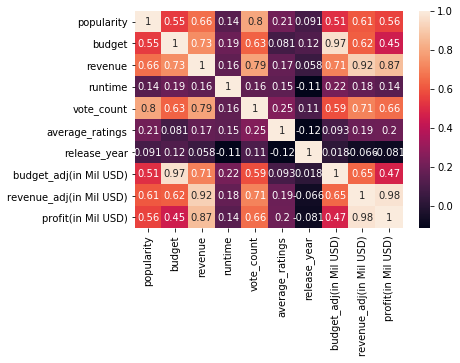

In [23]:
# By uing a heatmap and correlation matrix, we are able to have a quick glance at features that have effect on each other

sns.heatmap(movie_df_edited.corr(), annot=True);

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Q1- What is the relationship between the Profit and Vote Count as seen in the heatmap above

> Does the vote count a movie receive have an effect on the profits it makes? Let's find out

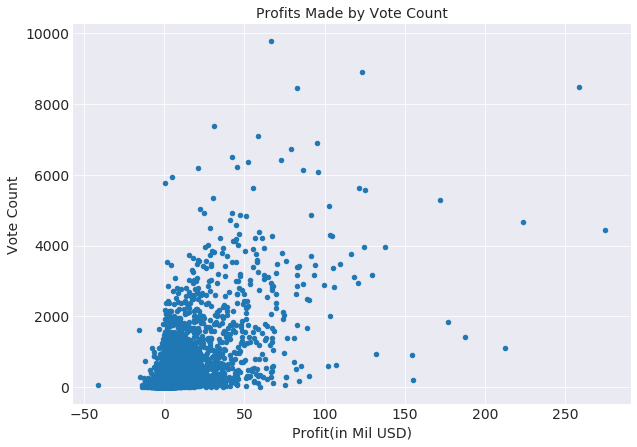

In [24]:
# Create a scatter plot to see what the relationship looks like

sns.set_style('darkgrid');
movie_df_edited.plot(x='profit(in Mil USD)', y='vote_count', kind='scatter', fontsize=14, figsize =(10, 7));
plt.xlabel("Profit(in Mil USD)", fontsize=14);
plt.ylabel('Vote Count', fontsize=14);
plt.title("Profits Made by Vote Count", fontsize=14);

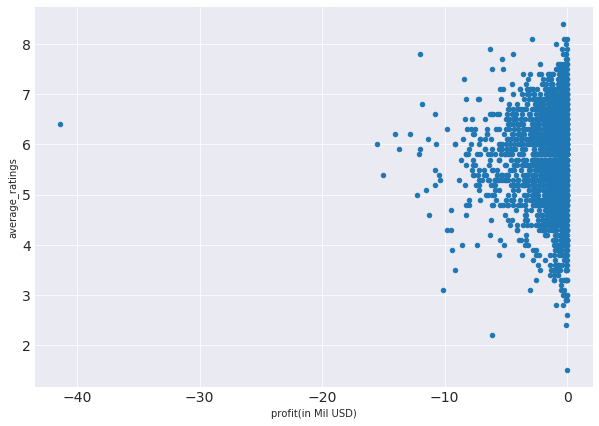

In [25]:
#The plot above shows some movies get close to 2000 votes and yet make loses. 
# Taking a closer look, we can see that, even though this movies made some loses, but they still get a 
# significant ratings from viewers, with only a few getting below an averge rating of 3 as seen in the 
# plot below.

movie_df_edited[movie_df_edited["profit(in Mil USD)"]< 0].plot(x='profit(in Mil USD)', y='average_ratings', kind='scatter', fontsize=14, figsize =(10, 7));

### Q2 - Does the popularity of a movie indicate how much profit the movie makes?


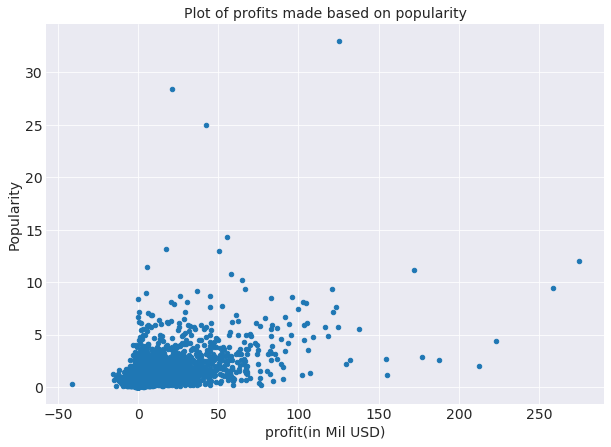

In [26]:
sns.set_style('darkgrid');
movie_df_edited.plot(y='popularity', x='profit(in Mil USD)', kind='scatter', fontsize=14, figsize =(10, 7));
plt.ylabel('Popularity', fontsize=14);
plt.xlabel("profit(in Mil USD)", fontsize=14);
plt.title("Plot of profits made based on popularity", fontsize=14);

> The scatter plot above shows that, popularity doesn't necessarily mean the most profitable.
To see the most popular and most profitable movies, we can take a further dive into the scatter plot
by looking at the 2 bar plots below. A keen look at the 2 plots below, tell us that, popularity doesn't mean
profitability

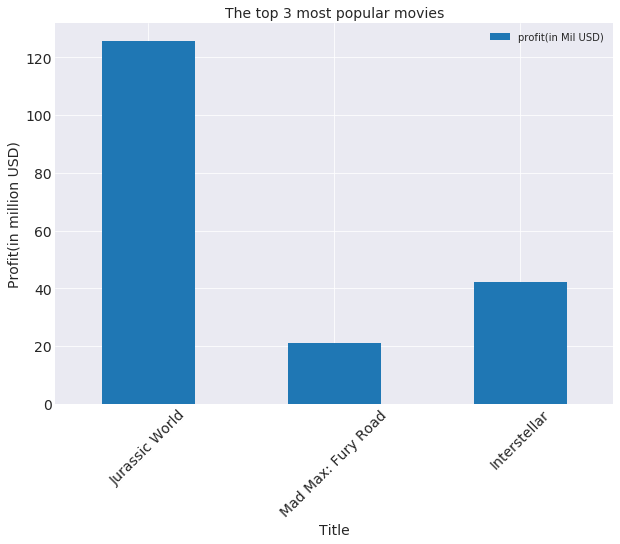

In [27]:
#The plot above shows there are 3 movies with popularity ratings above 20,
#what do these movies have in common, or are they outliers?
#fig = plt.subplots()

sns.set_style('darkgrid');
ax = movie_df_edited.query("popularity > 20")
ax.plot.bar(x='title', y='profit(in Mil USD)', rot=45, fontsize=14, figsize =(10, 7));
plt.xlabel('Title', fontsize=14);
plt.ylabel("Profit(in million USD)", fontsize=14);
plt.title("The top 3 most popular movies", fontsize=14);

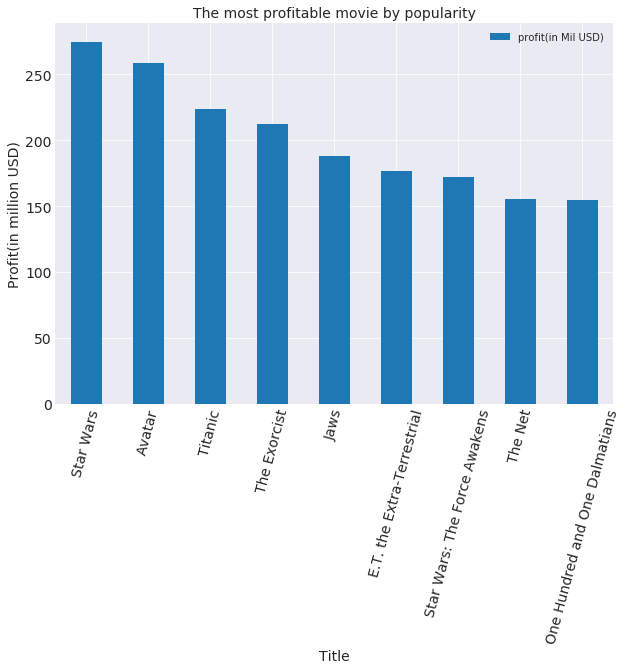

In [28]:
# Which movies are top 10  most profitable based on how popular they are

sns.set_style('darkgrid');
ax2 = movie_df_edited[movie_df_edited["profit(in Mil USD)"] > 150].sort_values(by=["profit(in Mil USD)"],ascending=False)
ax2.plot.bar(x='title', y='profit(in Mil USD)', rot=75, fontsize=14, figsize =(10, 7));
plt.xlabel('Title', fontsize=14);
plt.ylabel("Profit(in million USD)", fontsize=14);
plt.title("The most profitable movie by popularity", fontsize=14);

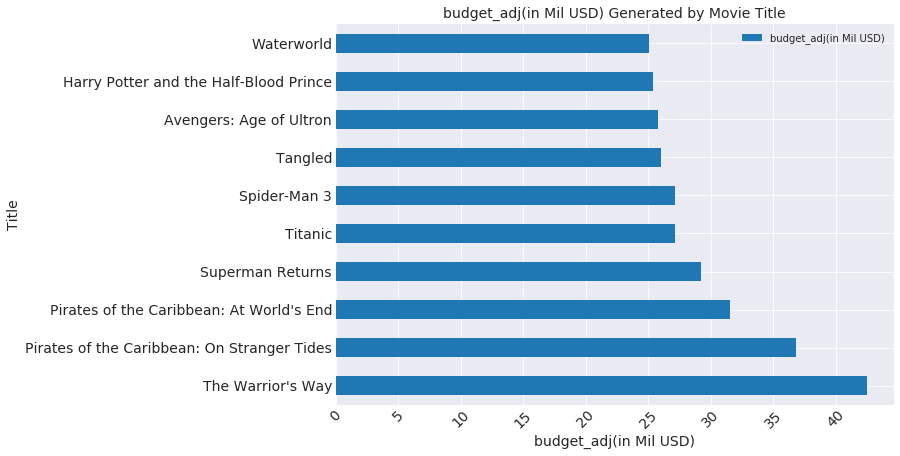

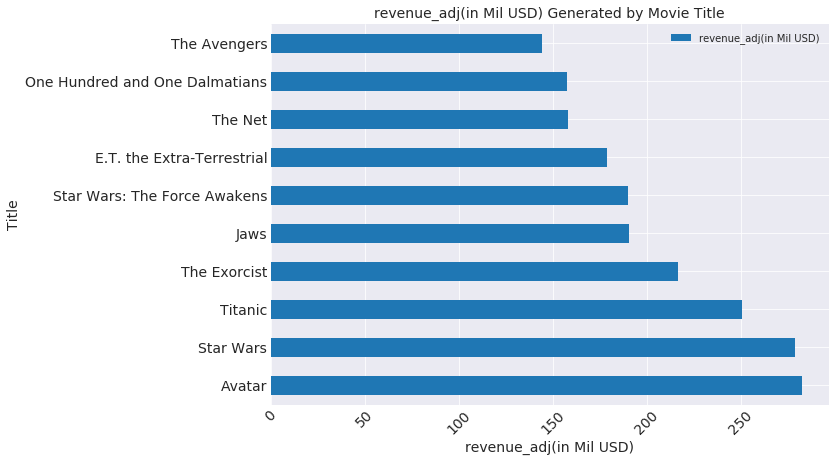

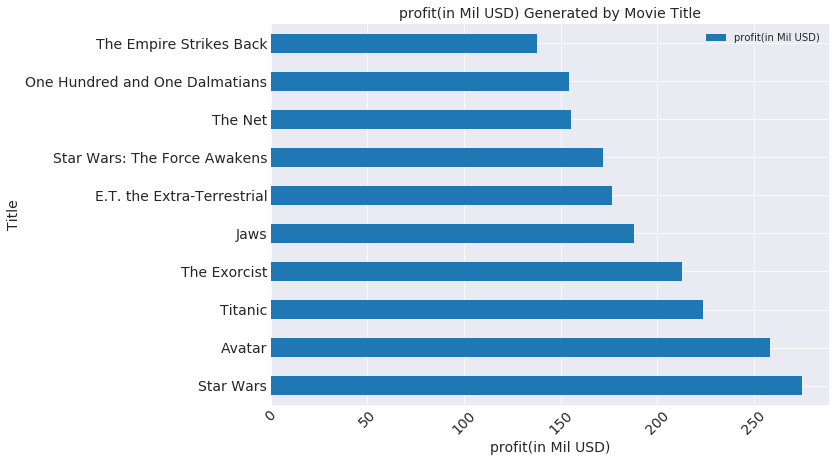

In [29]:
# Let us see the top 10 movies by Budget_adj, Revenue_adj and Profit made

sns.set_style('darkgrid');
for category in ['budget_adj(in Mil USD)', 'revenue_adj(in Mil USD)', 'profit(in Mil USD)']:
    plts = movie_df_edited[['title', f'{category}']].sort_values(f'{category}', ascending=False).set_index('title').head(10)
    
    plts.plot.barh(fontsize=14, figsize =(10, 7));
    plt.xticks(rotation=45)
    plt.xlabel(category, fontsize=14);
    plt.ylabel("Title", fontsize=14);
    plt.title(category + " Generated by Movie Title", fontsize=14);

In [30]:
#Details of the Star Wars movie by George Lucas
movie_df_edited[movie_df_edited['profit(in Mil USD)']==movie_df_edited['profit(in Mil USD)'].max()]

,popularity,budget,revenue,title,cast,director,runtime,genres,production_companies,release_date,vote_count,average_ratings,release_year,budget_adj(in Mil USD),revenue_adj(in Mil USD),profit(in Mil USD)
id,,,,,,,,,,,,,,,,
11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559,278.971224,275.013665


In [31]:
#George Lucas has directed 5 movies in relation to this datatset
#Most of his movies are of the Scientific Fiction Genre with an 
#average vote of 6.7
movies_by_most_profitable_movie_director = movie_df_edited.query('director == "George Lucas"') 

display("GEORGE LUCAS Movies Vote Average: "+ str(movies_by_most_profitable_movie_director['average_ratings'].mean()))

movies_by_most_profitable_movie_director.groupby('genres')['average_ratings'].mean().sort_values(ascending=False)

'GEORGE LUCAS Movies Vote Average: 6.7'

genres
Science Fiction|Adventure|Action          7.000000
Adventure|Action|Science Fiction          6.866667
Comedy|Drama                              6.500000
Drama|Mystery|Science Fiction|Thriller    6.100000
Name: average_ratings, dtype: float64

### What is the average ratings of other directors who have directed at least 5 movies.

> This metric will be compared to justify how well **George Lucas** has performed.

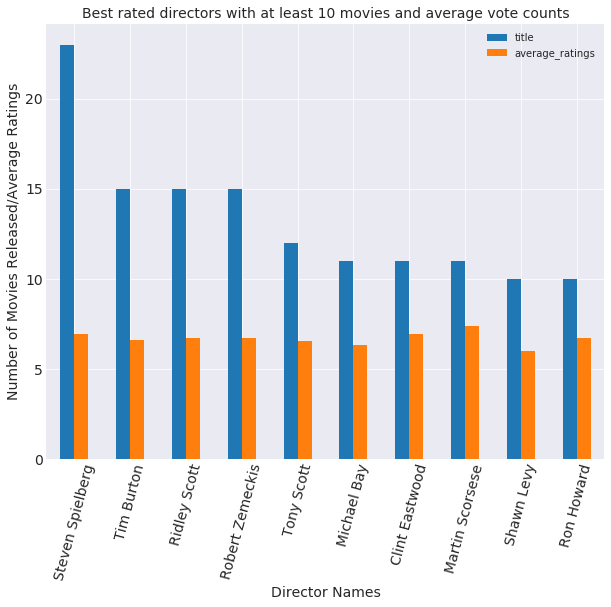

In [32]:
avg_vote_count = movie_df_edited[movie_df_edited["vote_count"] >= movie_df_edited['vote_count'].mean()]
dir_sub_df = avg_vote_count.groupby('director').agg({"title":"count","average_ratings":"mean"}).sort_values(['title','average_ratings'],ascending=[False,True])
dir_sub_df2 = dir_sub_df[dir_sub_df['title']>=5][:10]
dir_sub_df2.plot(kind='bar', fontsize=14, figsize=(10,8), rot=75);
plt.xlabel('Director Names', fontsize=14);
plt.ylabel("Number of Movies Released/Average Ratings", fontsize=14);
plt.title("Best rated directors with at least 10 movies and average vote counts", fontsize=14);

>**Answer** : The visual shows how well **George Lucas** who directed **Star Wars** performed in relation to other 
directors on the average. 

### Q3 a- What genre group has recorded the most profit in general.

> From the plot below, in can be seen that viewers are more attracted to **Comedy** and **Drama** movies. This is 
evident in both the vote counts as well as how much movies have been produced under these genres

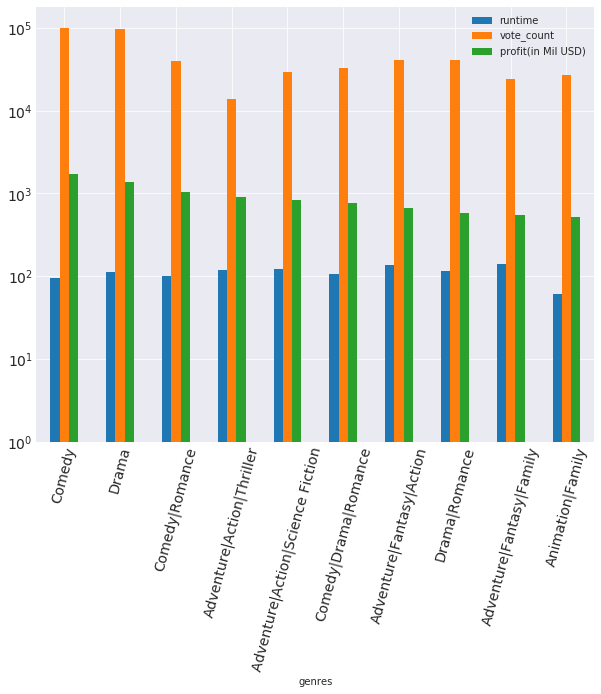

In [33]:
#What genre group has the highest vote counts 

genre_col = movie_df.groupby('genres').agg({'runtime':'mean','vote_count':'sum',"profit(in Mil USD)":"sum"}).sort_values("profit(in Mil USD)",ascending=False)
genre_col[:10].plot(kind='bar',log=True, fontsize=14, figsize=(10,8), rot=75);

### Q3 b-  Which of the Drama and Comedy Genres have seen the most movie releases since 1966.

> In the last cell, we discovered that, the **Comedy** and **Drama** genres have made the most profits as well as
most vote counts from viewers, but which of them have had the most movie releases.

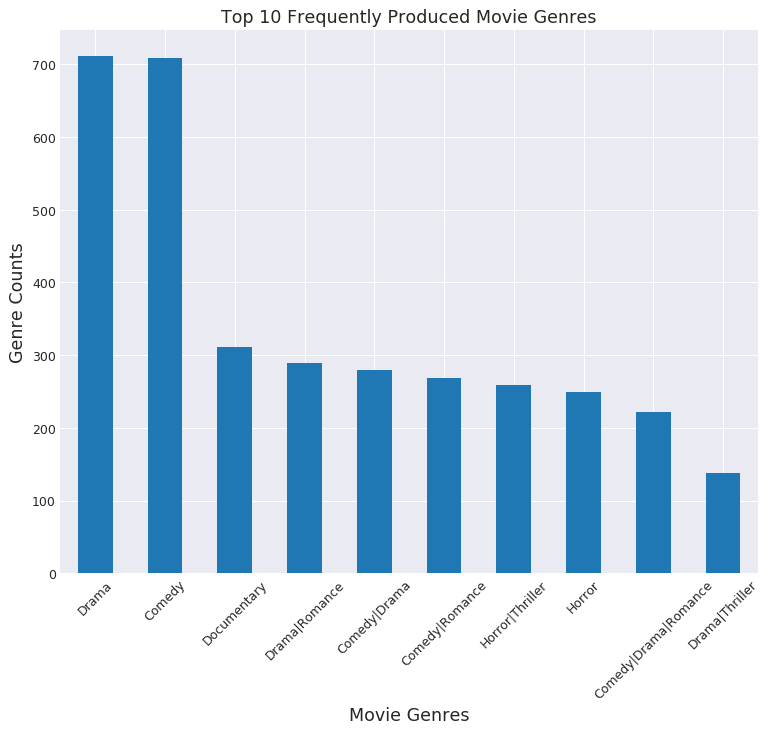

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8),dpi=90)
movie_df_edited['genres'].value_counts()[:10].plot(kind='bar');
plt.xticks(rotation=45);
plt.xlabel('Movie Genres', fontsize=14);
plt.ylabel("Genre Counts", fontsize=14);
plt.title("Top 10 Frequently Produced Movie Genres", fontsize=14);

    Contrary to what we got in the Q3 a, the most produced movie genre is the Drama genre and closely by the Comedy
    genre as expected. But surprisingly, the Documentary genre is the 3rd most produced movie even though it was not in the 
    top 10 most profitable movies by vote counts. This indicates that, quiet a number of documentary could be a No-Budget 
    produced movies. It is not a very much attractive genre to viewers as well

### Q4 a- Which decade produced the highest number of movies
> Which decade has contributed most to the release of movies from the dataset. Are producers and directors releasing 
movies the more by decades or more movies have been released in the past as compared to the recent decades. Let's find out

In [35]:
#Create a column in the dataset to divide release dates by decade
#This helps to reveal which decade has the highest number of movie release

def movie_decades(x):
    the_decade = str(x)[:-1]+'0'
    return the_decade

movie_df_edited['decade'] = movie_df_edited['release_year'].apply(lambda x: movie_decades(x))

In [36]:
#movie_df_edited.tail()

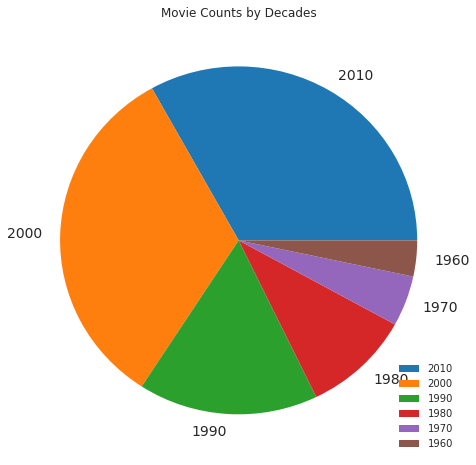

In [37]:
decade_movie_counts = movie_df_edited[['title']].groupby(movie_df_edited['decade']).count().sort_values(['title'], ascending=False)
plt.figure(dpi=80);
sns.set_style('darkgrid');
decade_movie_counts.plot.pie(y='title',figsize=(8,8),fontsize=14);
plt.title('Movie Counts by Decades')
plt.xticks(rotation=45, fontsize=14);
plt.ylabel("", fontsize=20);

>**_Answer_** : The pie chart above clearly shows that, more movies where released in the last 2 decades. These decades made up for more    than 50% of the total movies released.

### Q4 b- Which year were movies produced more. Is there a trend or pattern?

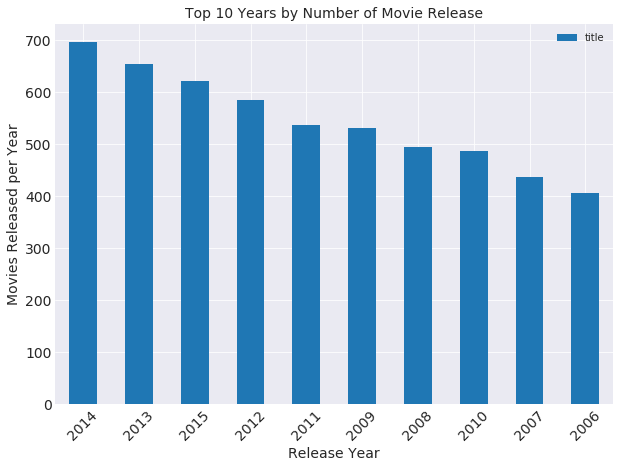

In [38]:
sns.set_style('darkgrid');
plt.figure(figsize=(12,10),dpi=200);
top_ten_years_by_movie_released = movie_df_edited.groupby('release_year').agg({'title':'count'}).sort_values(by='title',ascending=False)[:10]
top_ten_years_by_movie_released.plot(kind='bar', fontsize=14, figsize =(10, 7));
plt.xticks(rotation=45);
plt.xlabel('Release Year', fontsize=14);
plt.ylabel("Movies Released per Year", fontsize=14);
plt.title("Top 10 Years by Number of Movie Release", fontsize=14);

>**_Answer_** :The year 2014 saw the most movies produced. There was close to 700 movies released in this year 

### Q5 - There are certain columns with multiple values such as cast, production companies and genres. These columns appear multiple time in multiple movie. How do we know which of them has the most occurence

>This question basically wants to have an individual account for each of the elements in the above mentioned columns. A movie producing company can appear multiple time in multiple movies,same is applicable to the other 2 columns. This is best separated individually so that, every column has a particular number of rows of its own rather than exploding them in the whole dataframe and subsequently causing NaN in rows that do not match up with the other

In [39]:
#Create a function that checks the most occuring cast, production company and movie genre

def piped_columns(ls):
    df_sample = pd.DataFrame(movie_df_edited.loc[:,ls].str.split("|").explode(ls))
    display(df_sample.shape[0])
    df_sample = df_sample[ls].value_counts()[:10].plot(kind='bar',figsize=(10,8), rot=75, fontsize=14)  
    return (df_sample)

52502

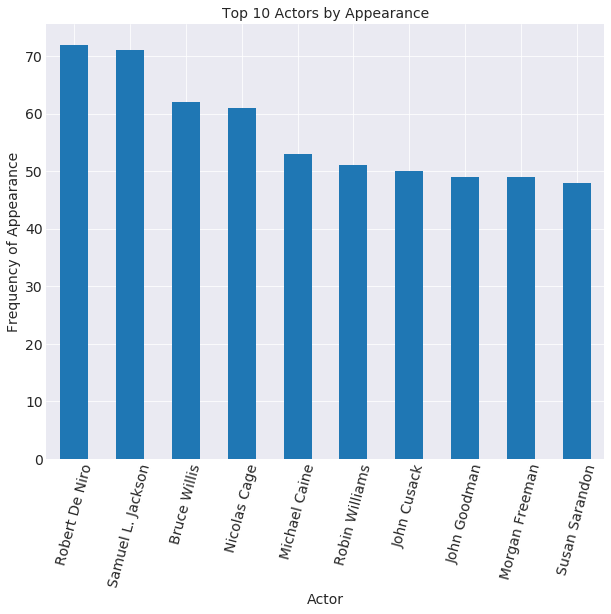

In [40]:
#pd.DataFrame(movie_df.loc[:,'genres'].str.split("|"))

most_appearing_cast = piped_columns('cast')
most_appearing_cast;
plt.xlabel('Actor', fontsize=14);
plt.ylabel("Frequency of Appearance", fontsize=14);
plt.title("Top 10 Actors by Appearance", fontsize=14);

>**_Answer_** :The plot above shows the top 10 all time appearance according to our data with **Robert De Niro** and **Samuel L. jackson**
    coming with the highest number of appearance in the movies

### Q5 b- What is the most frequent individual Movie Genre.
    In Q3, we were able to determine which genre group were the most frequent. This was so because a movie can be grouped 
    under various genres. However, in this question, we want to know which particular genre appeared the most in all movies released. 

26916

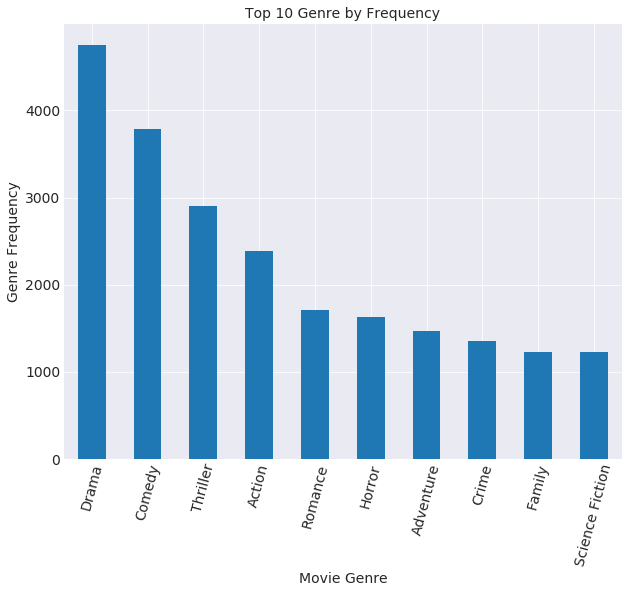

In [41]:

most_appearing_genre = piped_columns('genres')
plt.xlabel('Movie Genre', fontsize=14);
plt.ylabel("Genre Frequency", fontsize=14);
plt.title("Top 10 Genre by Frequency", fontsize=14);

>**_Answer_** : We can see again here that, the _Drama genre_ still lead the Comedy genre, but this time with an obvious margin 
    compared to what we got in question 3.

### Q5 c- Which Movie Producing Company has been involved in movie production the most.

    In this question, we attempt to find out which movie producing company has been involved in movie releases the most

24214

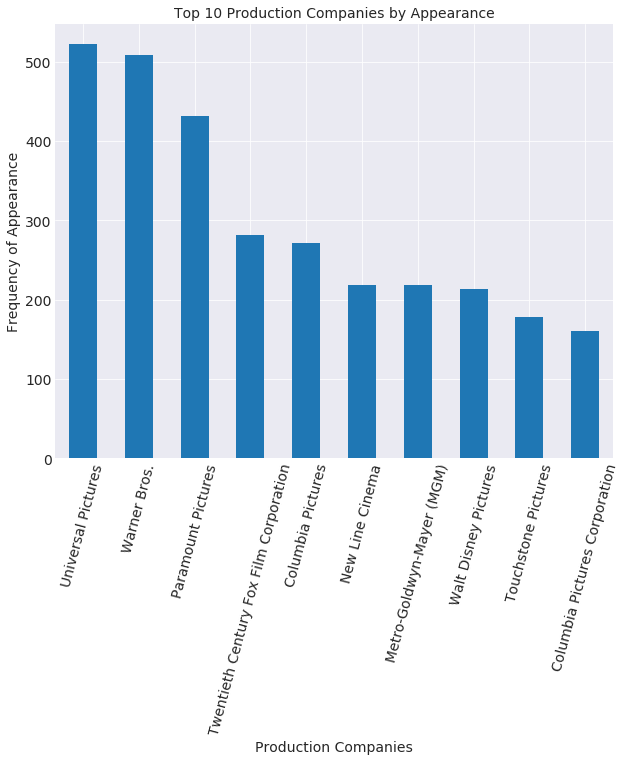

In [42]:

most_appearing_pc = piped_columns('production_companies')
most_appearing_pc;
plt.xlabel('Production Companies', fontsize=14);
plt.ylabel("Frequency of Appearance", fontsize=14);
plt.title("Top 10 Production Companies by Appearance", fontsize=14);

>__*Answer*__: The plot above shows that, **Universal Pictures, Warner Bros and Paramount Picture** are the top 3 
    movie producing companies in the industry 

## Conclusions

> **Tip**: From the analysis, the follow conclusions were made about the intented questions I wanted to ask;

>            i) The popularity of a movie doesn't mean the movie has a high rating. Even movies with very high 
            average ratings have been observed to make loses.
            
>            ii) Over the last 6 decades, the 2014 has recorded the highest number of movies released. 

>            iii) Although the Drama genre movies have shown to be the most of all movies produced,
                the comedy genre was seen to be the most profitable
                
>             iv) Star Wars produced by George Lucas has been the most profitable and was produced back
                  since the year 1977




### Limitations
> The limitaions of this dataset include;

>            i) There were movies with 0 runtime, this is not possible and as a result, they had to be removed.
                It's unclear how this data dropping could affect the analysis.
                
>            ii) If there is such error, is there a possibility that there could be other errors that may
                 have impacted my analysis? My analysis is limited to the quality of the data I got. I could 
                 only clean it as best as I could.



In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0